In [115]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def read_file(filename):
    params={}
    dist=[]
    with open("tiny_gph.dat","r") as f:
        lines=f.readlines()
        for line in lines:
            line=line[:-1]
            l=line.split(" ")
            if l[0]=="param" and l[1]!=":":
                params[l[1]]=l[-1][:-1]
            try:
                dist.append((int(l[0]),int(l[1]),float(l[2])))
            except:
                continue
    return params,dist
            
            

In [45]:
param,dist=read_file("tiny_gph.dat")

In [46]:
param

{'Kdim': '3', 'n': '38'}

In [47]:
dist

[(1, 2, 1.22664),
 (1, 3, 1.39515),
 (1, 4, 2.47463),
 (1, 5, 3.6222),
 (1, 6, 3.63798),
 (1, 7, 2.52213),
 (1, 8, 3.14195),
 (1, 9, 3.08184),
 (1, 10, 4.54867),
 (1, 11, 2.82026),
 (1, 12, 4.0627),
 (1, 13, 3.98525),
 (1, 14, 2.98023),
 (1, 15, 4.53928),
 (1, 16, 2.7638),
 (1, 17, 4.34809),
 (1, 22, 4.94446),
 (1, 25, 4.72587),
 (1, 29, 3.08679),
 (1, 30, 4.11506),
 (1, 32, 3.98568),
 (1, 37, 3.31114),
 (2, 3, 2.31605),
 (2, 4, 2.80393),
 (2, 5, 4.20491),
 (2, 6, 4.53685),
 (2, 7, 3.63805),
 (2, 8, 3.21547),
 (2, 9, 3.28287),
 (2, 10, 4.99467),
 (2, 11, 3.97857),
 (2, 12, 4.88936),
 (2, 13, 4.58428),
 (2, 14, 4.12092),
 (2, 16, 2.71423),
 (2, 17, 4.21612),
 (2, 21, 4.97502),
 (2, 22, 4.55497),
 (2, 25, 4.57796),
 (2, 29, 2.88229),
 (2, 30, 2.96872),
 (2, 31, 4.18956),
 (2, 32, 2.81522),
 (2, 33, 4.8974),
 (2, 34, 4.37386),
 (2, 35, 4.78031),
 (2, 37, 2.20559),
 (3, 4, 1.4833),
 (3, 5, 2.30291),
 (3, 6, 2.27031),
 (3, 7, 1.41421),
 (3, 8, 2.45626),
 (3, 9, 2.61842),
 (3, 10, 3.26928),


In [62]:
def mat_metrics(params, dists):
    num_points=int(params["n"])
    metric=np.ones((num_points,num_points))*np.inf
    for i in range(num_points):
        metric[i,i]=0.0
    for dist in dists:
        metric[dist[0]-1,dist[1]-1]=dist[2]
        metric[dist[1]-1,dist[0]-1]=dist[2]
    return metric

In [63]:
metric=mat_metrics(param,dist)

In [64]:
metric

array([[0.     , 1.22664, 1.39515, ...,     inf, 3.31114,     inf],
       [1.22664, 0.     , 2.31605, ...,     inf, 2.20559,     inf],
       [1.39515, 2.31605, 0.     , ...,     inf, 4.39445,     inf],
       ...,
       [    inf,     inf,     inf, ..., 0.     , 4.26751, 2.69704],
       [3.31114, 2.20559, 4.39445, ..., 4.26751, 0.     , 4.19558],
       [    inf,     inf,     inf, ..., 2.69704, 4.19558, 0.     ]])

In [65]:
def Floyd_Warshall(mat):
    dim=mat.shape[0]
    for z in range(dim):
        for u in range(dim):
            for v in range(dim):
                mat[u,v]=min(mat[u,v],mat[z,v]+mat[z,u])
    return mat
                

In [66]:
met=Floyd_Warshall(metric)

In [70]:
met

array([[0.     , 1.22664, 1.39515, ..., 7.27233, 3.31114, 6.27596],
       [1.22664, 0.     , 2.31605, ..., 6.04569, 2.20559, 5.12962],
       [1.39515, 2.31605, 0.     , ..., 8.06463, 4.39445, 6.87352],
       ...,
       [7.27233, 6.04569, 8.06463, ..., 0.     , 4.26751, 2.69704],
       [3.31114, 2.20559, 4.39445, ..., 4.26751, 0.     , 4.19558],
       [6.27596, 5.12962, 6.87352, ..., 2.69704, 4.19558, 0.     ]])

In [104]:
def remove_iso(mat):
    dim=mat.shape[0]
    d=[]
    for z in range(dim):
        if mat[z,0]==np.inf:
            d.append(z)
    mat=np.delete(mat,d,axis=0)
    mat=np.delete(mat,d,axis=1)
    return mat

In [105]:
met=remove_iso(met)

In [106]:
def dist2Gram(D):
    n = D.shape[0]
    J = np.identity(n) - (1.0/n)*np.ones((n,n))
    G = -0.5 * J@(D@(D@J))
    return G

In [107]:
gram=dist2Gram(met)
gram

array([[ -45.38107598,  -40.12928235,  -42.06408009, ...,   23.18292355,
         -27.93227332,   20.94955504],
       [ -40.12928235,  -47.42076234,  -27.62536465, ...,  -16.61815202,
         -51.92415488,  -12.13221443],
       [ -42.06408009,  -27.62536465,  -54.81449736, ...,   79.93130255,
           8.65865617,   56.02200496],
       ...,
       [  23.18292355,  -16.61815202,   79.93130255, ..., -306.68369114,
        -150.50361773, -184.31434987],
       [ -27.93227332,  -51.92415488,    8.65865617, ..., -150.50361773,
        -121.10229402,  -90.66107899],
       [  20.94955504,  -12.13221443,   56.02200496, ..., -184.31434987,
         -90.66107899, -132.65472352]])

In [111]:
def factor(A):
    n = A.shape[0]
    (evals,evecs) = np.linalg.eigh(A)
    evals[evals < 0] = 0 # closest SDP matrix
    X = evecs
    sqrootdiag = np.eye(n)
    for i in range(n):
        sqrootdiag[i,i] = np.sqrt(evals[i])
    X = X.dot(sqrootdiag)
    # because default eig order is small->large
    return np.fliplr(X)

In [112]:
def PCA(B,K):
    x = factor(B)
    # only first K columns
    x = x[:,0:K]
    return x

In [117]:
new_coord_2=PCA(met,2)

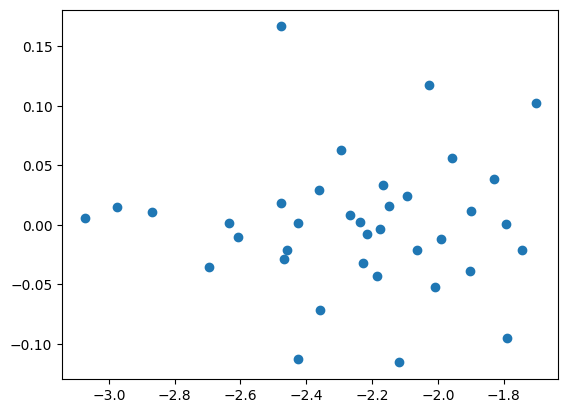

In [120]:
plt.scatter(new_coord_2[:,0],new_coord_2[:,1])
plt.show()

In [121]:
new_coord_3=PCA(met,3)

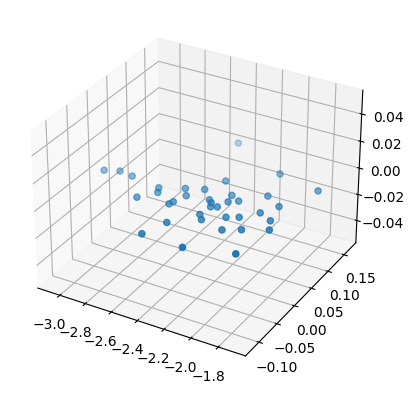

In [128]:
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter(new_coord_3[:,0],new_coord_3[:,1],new_coord_3[:,2])
plt.show()